In [1]:
# Define paths to the dataset
train_dir = r'C:\Users\samer\OneDrive\Desktop\train'
test_dir = r'C:\Users\samer\OneDrive\Desktop\test'

In [2]:
import os

train_adults_path = r'C:\Users\samer\OneDrive\Desktop\train\adults'
train_children_path = r'C:\Users\samer\OneDrive\Desktop\train\children'
test_adults_path = r'C:\Users\samer\OneDrive\Desktop\test\adults'
test_children_path = r'C:\Users\samer\OneDrive\Desktop\test\children'

print(len(os.listdir(train_adults_path)))
print(len(os.listdir(train_children_path)))
print(len(os.listdir(test_adults_path)))
print(len(os.listdir(test_children_path)))


340
340
60
60


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3  # Split 30% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)


Found 476 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


In [4]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [5]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [6]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [7]:
history = model.fit(train_data, epochs=8, validation_data=validation_data)

Epoch 1/8


15/15 [==============================] - 17s 1s/step - loss: 0.7286 - accuracy: 0.4958 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 2/8
15/15 [==============================] - 14s 946ms/step - loss: 0.6872 - accuracy: 0.5294 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 3/8
15/15 [==============================] - 15s 1s/step - loss: 0.6845 - accuracy: 0.5189 - val_loss: 0.7178 - val_accuracy: 0.5000
Epoch 4/8
15/15 [==============================] - 14s 952ms/step - loss: 0.6639 - accuracy: 0.6239 - val_loss: 0.7606 - val_accuracy: 0.5000
Epoch 5/8
15/15 [==============================] - 15s 1s/step - loss: 0.6451 - accuracy: 0.6387 - val_loss: 0.6897 - val_accuracy: 0.5490
Epoch 6/8
15/15 [==============================] - 14s 925ms/step - loss: 0.5913 - accuracy: 0.6723 - val_loss: 0.8685 - val_accuracy: 0.5686
Epoch 7/8
15/15 [==============================] - 15s 992ms/step - loss: 0.5589 - accuracy: 0.6975 - val_loss: 0.7427 - val_accuracy: 0.5539
Epoch 8/8
15/

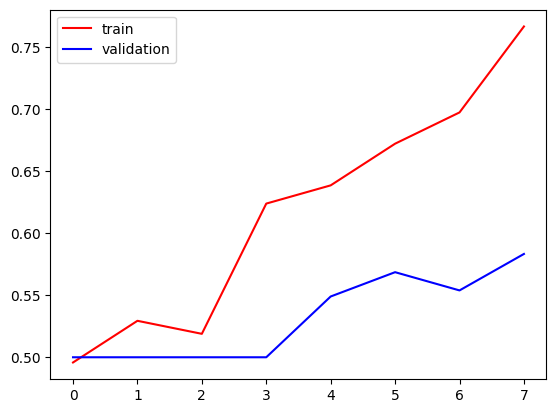

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

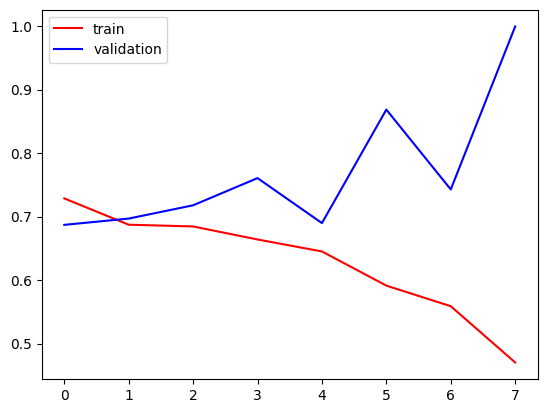

In [9]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 120 images belonging to 2 classes.


In [11]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

4/4 [==============================] - 1s 201ms/step
[[0.07357318]
 [0.0989605 ]
 [0.45552373]
 [0.4106033 ]
 [0.27815825]
 [0.5303348 ]
 [0.31006053]
 [0.89855456]
 [0.10018092]
 [0.0335077 ]
 [0.99619764]
 [0.02277143]
 [0.03978346]
 [0.42516083]
 [0.91187245]
 [0.42504114]
 [0.99818385]
 [0.46228632]
 [0.97972256]
 [0.25190523]
 [0.65489954]
 [0.04038841]
 [0.31328136]
 [0.999471  ]
 [0.00981626]
 [0.9996846 ]
 [0.10151093]
 [0.06724804]
 [0.87515765]
 [0.99831116]
 [0.3248974 ]
 [0.15145639]
 [0.32685956]
 [0.53663   ]
 [0.5516938 ]
 [0.10627294]
 [0.86511475]
 [0.10932872]
 [0.09106844]
 [0.3905771 ]
 [0.58802176]
 [0.39540365]
 [0.07063658]
 [0.15656053]
 [0.71950763]
 [0.04707265]
 [0.01858346]
 [0.7034117 ]
 [0.0376565 ]
 [0.05566785]
 [0.03955606]
 [0.9029757 ]
 [0.91319454]
 [0.10489324]
 [0.06780996]
 [0.69055676]
 [0.08793867]
 [0.9287524 ]
 [0.07854371]
 [0.38522428]
 [0.160032  ]
 [0.10646621]
 [0.58534384]
 [0.21880224]
 [0.07153813]
 [0.49673307]
 [0.22934519]
 [0.51171

In [12]:
len(predictions)

120

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[39 21]
 [42 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.65      0.55        60
           1       0.46      0.30      0.36        60

    accuracy                           0.48       120
   macro avg       0.47      0.47      0.46       120
weighted avg       0.47      0.47      0.46       120

